# pNarrative


A python module for the extraction of sentiment and sentiment-based plot arcs from text. Inspired from the American author Kurt Vonnegut's rejected thesis (see a [lecture here](https://www.youtube.com/watch?v=oP3c1h8v2ZQ)) and Matthew Jockers' [Syuzhet](https://github.com/mjockers/syuzhet) R package, but with another method for extracting/estimating the "macro" shape of narratives, namely using the probabilistic framework of Gaussian Processes.  


The GP implementation for this module is using the pseudo code from C. E. Rasmussen's & C. K. I. Williams's [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/chapters/RW.pdf) (Algorithm 2.1, p. 19)



## NOTE: THE MODULE IS STILL UNDER DEVELOPMENT AND IT MAY CONTAIN FEW BUGS

### Installation

First install the requirements/dependecies listed in the _requirements.txt_ file

```
pip install -r requirements.txt

```

and then install the module by

```
python setup.py install
```


### Demonstration/Example

The workflow of the module can be summarized as follows:


1. Initialize an object (read text)
    ```
    from pNarrative import Narrative
    book = Narrative.Narrative(text = book_text)
    ```
2. Split text into segments
    ```
    book.segment_text(mode = "sentence", lower = True)
    ```
3. Get segment-sentiment scores
    ```
    from pNarrative.parsers
    sentiment_lexicon = get_sentiment_lexicon("afinn","sv") 
    book.get_sentiment_score(lexicon = sentiment_lexicon)
    ```
4. Estimate Narrative Arc/Plot
    ```
    from pNarrative.kernels.rbf import rbf
    book.get_narrative_estimation(kernel= rbf, kernel_parameters= {"el":20, "sigma":1})
    ```
5. Plot Narrative Arc/Plot
    ```
    book.plot_narrative(type = "gp", plot_errors = True)
    ```
    
    
For this particular demonstration we will use the Swedish written book ["Bannlyst"](http://www.gutenberg.org/cache/epub/39147/pg39147.txt) by the late author Selma Lagerlöf, accessed through the website of the Gutenberg project.  

In [7]:
from pNarrative import Narrative
import requests
from pNarrative.kernels.rbf import rbf
from pNarrative.parser.sentiment_scorer import get_sentiment_lexicon

__Step 1:__ Init a "Narrative"-object

In [9]:
example_URL = "http://www.gutenberg.org/cache/epub/39147/pg39147.txt"
r = requests.get(example_URL)
book = Narrative.Narrative(book=r.text,id="Bannlyst - Selma Lagerlöf") 

Note: The "id" argument will used as the header when plotting the Narrative in the last step

__Step 2:__ Segment text  

In this example, we'll segment the text into sentences by setting the segmentation mode to "sentence". However, you could also split the text to any definition of a segment by setting the mode to "custom" and supplying a regex pattern to the "pattern" argument.

```
book.segment_text(mode = "custom", pattern = r'\.')
```


In [13]:
book.segment_text(mode = "sentence")
print("Number of sentences: {}\n\n".format(book.nrSegments))

print("Examples of sentences:")
print("_"*80)
for i, sent in enumerate(book.segments[200:205]):
    print("\t{}. {:<200}".format(i+1, sent))

Number of sentences: 5158


Examples of sentences:
________________________________________________________________________________
	1. På måndagen var det också fester och tillställningar, men
sen på en gång var det stopp.                                                                                                                
	2. Det hade kommit ut onda rykten om
nordpolsfararna.                                                                                                                                                     
	3. Hustruns ansikte stelnade till.                                                                                                                                                                         
	4. Ska jag nu få höra, att han har gjort något orätt?                                                                                                                                                      
	5. mumlade hon mellan
hårt sammanbitna tänder.   

__Step 3:__ Get sentiment Scores  

You could use any custom sentiment lexicon to extract the sentence sentiments by using the "create_lexicon" function which takes a .txt file and converts it to a dictonary-formed python object. However, this module includes a number of lexicon that we can access using the "get_sentiment_lexicon" function. 

In this case we will use the [AFINN-SV-165](https://github.com/fnielsen/afinn/blob/master/afinn/data/AFINN-sv-165.txt) sentiment lexicon. 

In [16]:
lexicon_sv = get_sentiment_lexicon(lexicon = "afinn",lang="sv")
book.get_sentiment_score(lexicon=lexicon_sv)

__Step 4:__  Plot Narrative Arc/Plot

Then we simply run the __get\_narrative\_estimation__  method to get the "macro" shape of the narrative. For this particular case, we'll use the rbf (radial basis function), a.k.a. the squared expontential, kernel with the parameters $\sigma = 1$ and $\ell = 20$. 

In [18]:
%%timeit
book.get_narrative_estimation(kernel= rbf, kernel_parameters= {"el":20, "sigma":1})

576 ms ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


__Step 5:__ Plotting the Narrative

To plot the estimated narrative, use the __plot\_narrative__ method. 

Currently supports the following plot types

1. "gp"
2. "rolling_mean"
3. "merged" - Using both the gp-method and rolling mean

__Without Scaling:__



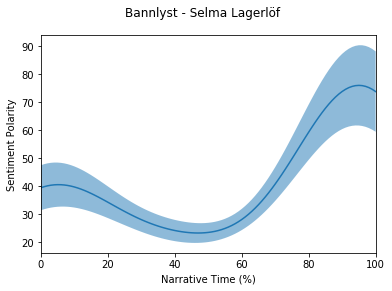

In [22]:
# 1. gp
book.plot_narrative(type = "gp", plot_errors=True, scale_narrative=False)

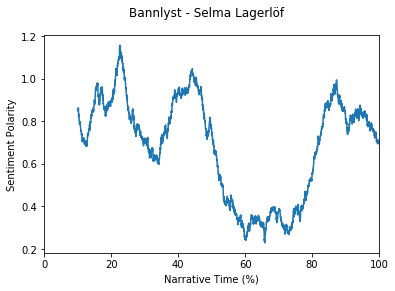

In [24]:
# 2. rolling mean

# The wdw_size specifies the window size of the rolling mean. Default: 10 percent of the length of the vector
book.plot_narrative(type = "rolling_mean",scale_narrative=False)


__With Scaling:__

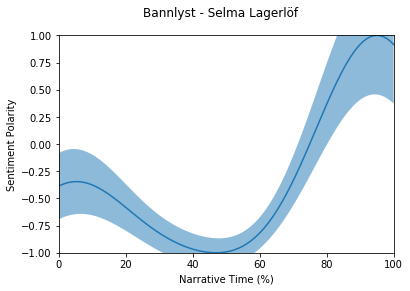

In [25]:
# 1. gp
book.plot_narrative(type = "gp", plot_errors=True, scale_narrative=True)

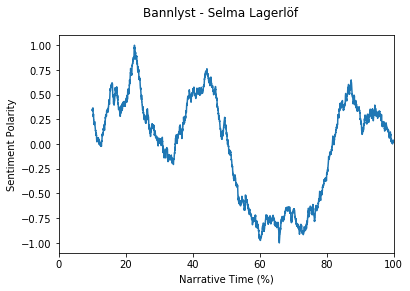

In [26]:
# 2. rolling mean
book.plot_narrative(type = "rolling_mean",scale_narrative=True)

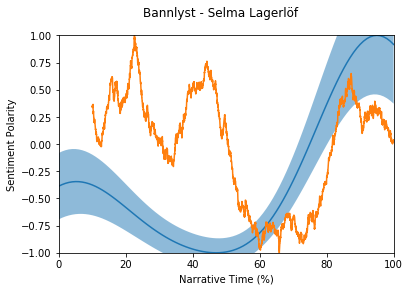

In [28]:
# 3. Merged

# When using the "merged" type, the narratives are automatically scaled 
book.plot_narrative(type = "merged",scale_narrative=True, plot_errors = True)